In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('measures_v2.csv')



# Select input features (include coolant)
input_features = ['i_d', 'i_q', 'motor_speed', 'u_q', 'torque', 'coolant']
target = 'stator_winding'

X = df[input_features]
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("🌲 Random Forest:")
print("✅ R² Score:", r2_score(y_test, y_pred_rf))
print("✅ RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


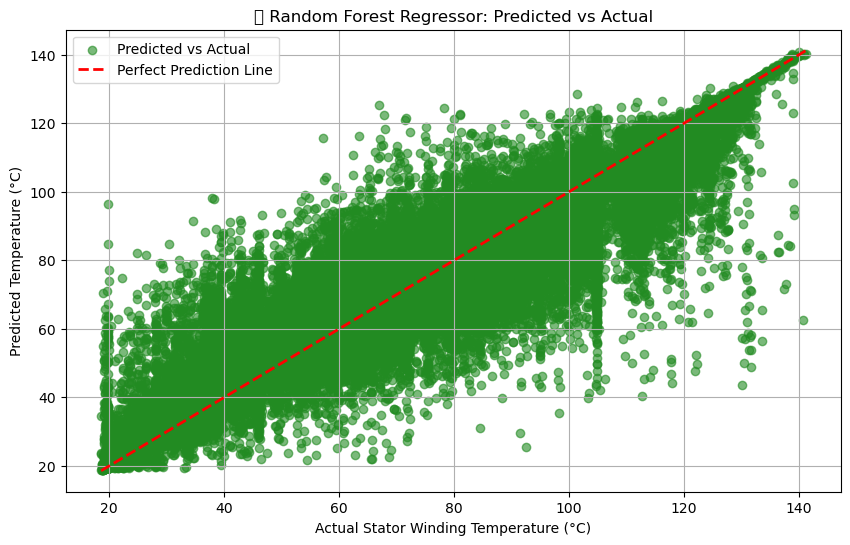

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='forestgreen', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Stator Winding Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('🌲 Random Forest Regressor: Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.title("🌲 Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


NameError: name 'rf_model' is not defined